설 연휴 관련 조사

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [2]:
# 데이터 읽어 오기
df = pd.read_excel("C:\\Users\\dhwhang\\Downloads\\250205_15652_설 연휴 관련 조사 1.xlsx")
df.head()

,ID,UID,STATUS,STARTTIME,ENDTIME,DEVICE,SQ1,SQ2,SQ2_R,SQ2_R_R,...,A4_1,A4_1#ETC_6,A4_1_COPY_1,A4_1_COPY_1#ETC_6,A4_2,A4_2#ETC_6,A5,A6,A7,A8
0,1,100469,COMPLETE,2025-01-22 19:04:21,2025-01-22 19:05:24,PC,1,71,6,6,...,4.0,NaN,NaN,NaN,4.0,NaN,1,2.0,3,3.0
1,2,100536,COMPLETE,2025-01-22 17:22:57,2025-01-22 17:23:46,Mobile/Android,1,69,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,3.0
2,3,1005774,COMPLETE,2025-01-22 19:21:03,2025-01-22 19:21:35,Mobile/Android,1,54,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,3.0
3,4,101083,COMPLETE,2025-01-22 22:49:42,2025-01-22 22:50:27,Mobile/iPhone,2,43,4,4,...,4.0,NaN,NaN,NaN,4.0,NaN,1,2.0,1,4.0
4,5,101190,COMPLETE,2025-01-23 05:47:11,2025-01-23 05:47:55,Mobile/Android,2,49,4,4,...,7.0,NaN,NaN,NaN,7.0,NaN,1,1.0,3,1.0


In [3]:
# 연령 분포 확인

def demo_age(age):
    if age == 1:
        return '10 ages'
    elif age == 2:
        return '20 ages'
    elif age == 3:
        return '30 ages'
    elif age == 4:
        return '40 ages'
    elif age == 5:
        return '50 ages'
    else:
        return '60 ages over'

In [4]:
def demo_sex(sex):
    if sex == 1:
        return 'male'
    else:
        return 'female'

In [5]:
df['age'] = df['SQ2_R_R'].apply(demo_age)
df['sex'] = df['SQ1'].apply(demo_sex)

df.head()

,ID,UID,STATUS,STARTTIME,ENDTIME,DEVICE,SQ1,SQ2,SQ2_R,SQ2_R_R,...,A4_1_COPY_1,A4_1_COPY_1#ETC_6,A4_2,A4_2#ETC_6,A5,A6,A7,A8,age,sex
0,1,100469,COMPLETE,2025-01-22 19:04:21,2025-01-22 19:05:24,PC,1,71,6,6,...,NaN,NaN,4.0,NaN,1,2.0,3,3.0,60 ages over,male
1,2,100536,COMPLETE,2025-01-22 17:22:57,2025-01-22 17:23:46,Mobile/Android,1,69,6,6,...,NaN,NaN,NaN,NaN,2,NaN,3,3.0,60 ages over,male
2,3,1005774,COMPLETE,2025-01-22 19:21:03,2025-01-22 19:21:35,Mobile/Android,1,54,5,5,...,NaN,NaN,NaN,NaN,2,NaN,1,3.0,50 ages,male
3,4,101083,COMPLETE,2025-01-22 22:49:42,2025-01-22 22:50:27,Mobile/iPhone,2,43,4,4,...,NaN,NaN,4.0,NaN,1,2.0,1,4.0,40 ages,female
4,5,101190,COMPLETE,2025-01-23 05:47:11,2025-01-23 05:47:55,Mobile/Android,2,49,4,4,...,NaN,NaN,7.0,NaN,1,1.0,3,1.0,40 ages,female


In [6]:
df_age = df.groupby([df['sex'],df['age']])[['ID']].count().reset_index()
df_age.rename(columns={'ID': 'count'}, inplace=True)
df_age

,sex,age,count
0,female,10 ages,90
1,female,20 ages,93
2,female,30 ages,89
3,female,40 ages,111
4,female,50 ages,141
5,female,60 ages over,199
6,male,10 ages,43
7,male,20 ages,100
8,male,30 ages,97
9,male,40 ages,113


In [7]:
df_age_pivot = df_age.pivot(index = 'age', columns= 'sex', values= 'count').fillna(0)
df_age_pivot

sex,female,male
age,,
10 ages,90,43
20 ages,93,100
30 ages,89,97
40 ages,111,113
50 ages,141,144
60 ages over,199,192


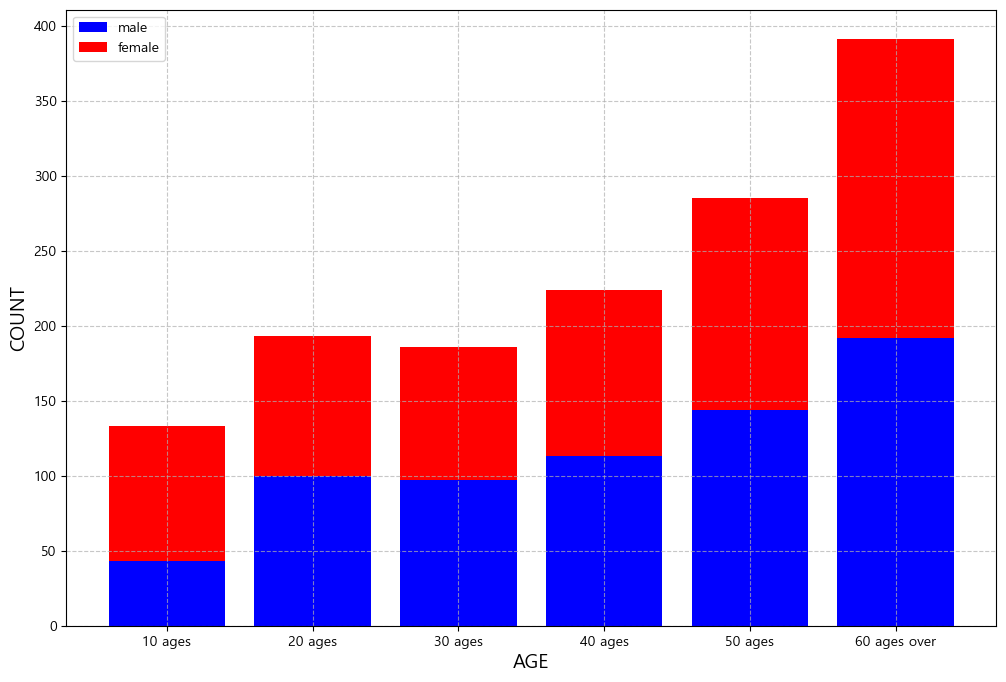

In [8]:
plt.figure(figsize=(12, 8))
plt.bar(df_age_pivot.index, df_age_pivot['male'], label = 'male', color='blue')
plt.bar(df_age_pivot.index, df_age_pivot['female'], bottom=df_age_pivot['male'], label = 'female', color='red')
plt.xlabel('AGE', fontsize=14)
plt.ylabel('COUNT', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# plt.figure(figsize=(12, 8))
# plt.bar(df_age['age'],df_age['count'], label = 'male')
# plt.bar(df_age['age'],df_age['count'], )
# plt.grid(True)
# plt.xlabel('age') ## x축 라벨 출력
# plt.ylabel('count') ## y축 라벨 출력
# plt.show()

In [15]:
# 연령대별 설 연휴에 계획이 있는지 확인
df_age_work = df.groupby([df['age'],df['A2'],df['sex']])[['ID']].count().reset_index()

df_10age_work = df_age_work[df_age_work['age'] == '10 ages']
df_20age_work = df_age_work[df_age_work['age'] == '20 ages']
df_30age_work = df_age_work[df_age_work['age'] == '30 ages']
df_40age_work = df_age_work[df_age_work['age'] == '40 ages']
df_50age_work = df_age_work[df_age_work['age'] == '50 ages']
df_60age_work = df_age_work[df_age_work['age'] == '60 ages over']

In [16]:
df_10age_work

,age,A2,sex,ID
0,10 ages,1,female,44
1,10 ages,1,male,24
2,10 ages,2,female,29
3,10 ages,2,male,12
4,10 ages,3,female,9
5,10 ages,3,male,3
6,10 ages,4,female,8
7,10 ages,4,male,4


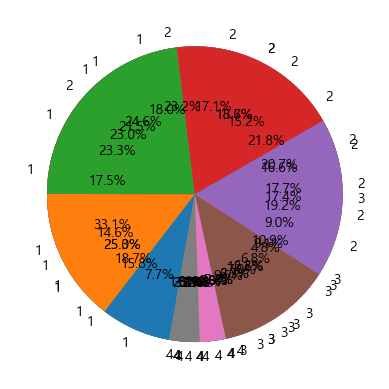

In [ ]:
plt.subplot(2,3,1)
plt.pie(df_10age_work['ID'], labels=df_10age_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

plt.subplot(2,3,2)
plt.pie(df_20age_work['ID'], labels=df_20age_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)

plt.subplot(3,3,3)
plt.pie(df_30age_work['ID'], labels=df_30age_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)

plt.subplot(2,3,4)
plt.pie(df_40age_work['ID'], labels=df_40age_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)

plt.subplot(2,3,5)
plt.pie(df_50age_work['ID'], labels=df_50age_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)

plt.subplot(2,3,6)
plt.pie(df_60age_work['ID'], labels=df_60age_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
